In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.__version__

'2.4.1+cu121'

In [ ]:
train_dataset = datasets.FashionMNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.FashionMNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128,
                                          shuffle=False)

100%|██████████| 26421880/26421880 [00:02<00:00, 12544141.87it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212682.60it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 973610.13it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20466613.26it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

(3, 482, 242)


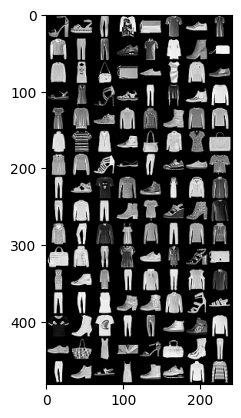

tensor([5, 5, 1, 6, 8, 0, 9, 3, 2, 1, 1, 7, 0, 6, 9, 8, 2, 0, 8, 8, 7, 3, 2, 9,
        5, 0, 5, 5, 1, 2, 9, 2, 3, 0, 9, 6, 2, 9, 2, 2, 4, 0, 6, 9, 8, 4, 0, 8,
        6, 2, 5, 5, 1, 7, 7, 0, 1, 5, 0, 2, 7, 3, 4, 6, 1, 6, 1, 9, 6, 5, 9, 2,
        4, 1, 6, 3, 6, 1, 2, 2, 8, 4, 1, 0, 7, 4, 5, 8, 3, 9, 4, 1, 2, 1, 2, 6,
        1, 1, 0, 9, 9, 4, 5, 5, 0, 9, 0, 1, 1, 7, 7, 2, 7, 8, 3, 8, 5, 8, 9, 1,
        1, 9, 5, 3, 9, 7, 2, 2])


In [ ]:
import torchvision
images, labels = next(iter(train_loader))    # get one batch from data loader
img_grid = torchvision.utils.make_grid(images)    # make a grid from batch
img_grid = img_grid.numpy()    # convert images to numpy for display
print(img_grid.shape)
plt.imshow(np.transpose(img_grid,  (1, 2, 0)))
plt.show()
print(labels)

In [ ]:
import torch
import torch.nn as nn
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1=nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2=nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
    self.flatten=nn.Flatten()
    self.linear1=nn.Linear(in_features=32*7*7, out_features=128)
    self.linear2=nn.Linear(in_features=128, out_features=10)
    self.relu=nn.ReLU()
    self.softmax=nn.Softmax(dim=1)
  def forward(self, x):
    x=self.relu(self.conv1(x))
    # x=(self.conv1(x))
    x=self.pool1(x)
    x=self.relu(self.conv2(x))
    # x=(self.conv2(x))
    x=self.pool2(x)
    x=self.flatten(x)
    x=self.relu(self.linear1(x))
    x=self.softmax(self.linear2(x))
    return x

In [ ]:
CNN_model=CNN().to(device)
print(CNN_model)
print("Number of Parameters: ", sum(p.numel() for p in CNN_model.parameters()))


CNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1568, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Number of Parameters:  221226


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.001)
num_epochs = 10

In [ ]:
loss_list = []
iteration_list = []
accuracy_list = []
for i in range(num_epochs):
  for j, (images, labels) in enumerate(train_loader):
    images = Variable(images.to(device))
    labels = Variable(labels.to(device))
    images=images.view(-1, 1, 28, 28)
    optimizer.zero_grad()
    outputs = CNN_model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if j % len(train_loader) == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(i+1, num_epochs, j+1, len(train_loader), loss.item()))
      loss_list.append(loss.item())
      iteration_list.append(len(loss_list))
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          images = images.view(-1, 1, 28, 28)
          outputs = CNN_model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  accuracy_list.append(100 * correct / total)
  print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/10], Step [1/469], Loss: 2.3016
Test Accuracy of the model on the 10000 test images: 73.56 %
Epoch [2/10], Step [1/469], Loss: 1.8064
Test Accuracy of the model on the 10000 test images: 84.49 %
Epoch [3/10], Step [1/469], Loss: 1.6055
Test Accuracy of the model on the 10000 test images: 86.91 %
Epoch [4/10], Step [1/469], Loss: 1.5846
Test Accuracy of the model on the 10000 test images: 84.3 %
Epoch [5/10], Step [1/469], Loss: 1.6055
Test Accuracy of the model on the 10000 test images: 87.84 %
Epoch [6/10], Step [1/469], Loss: 1.5586
Test Accuracy of the model on the 10000 test images: 87.73 %
Epoch [7/10], Step [1/469], Loss: 1.5955
Test Accuracy of the model on the 10000 test images: 88.22 %
Epoch [8/10], Step [1/469], Loss: 1.5725
Test Accuracy of the model on the 10000 test images: 89.17 %
Epoch [9/10], Step [1/469], Loss: 1.5521
Test Accuracy of the model on the 10000 test images: 89.91 %
Epoch [10/10], Step [1/469], Loss: 1.5782
Test Accuracy of the model on the 10000 t

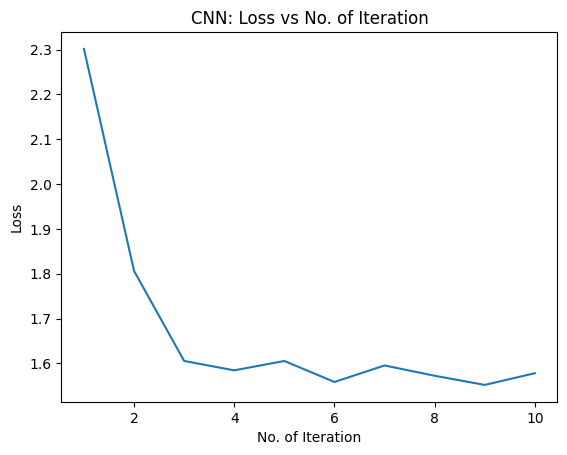

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs No. of Iteration")
plt.show()

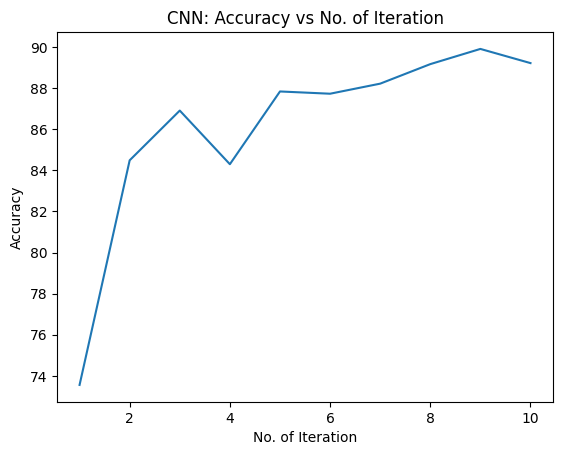

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs No. of Iteration")
plt.show()

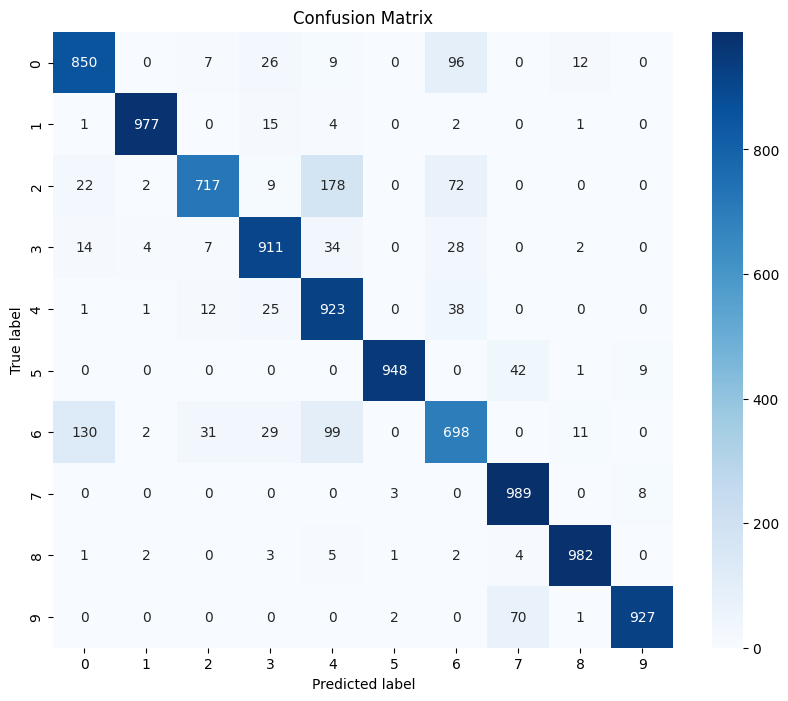

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.93      0.72      0.81      1000
           3       0.89      0.91      0.90      1000
           4       0.74      0.92      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.75      0.70      0.72      1000
           7       0.90      0.99      0.94      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return np.array(y_true), np.array(y_pred)
y_true, y_pred = get_predictions_and_labels(CNN_model, test_loader, device)
classes = list(range(10))
plot_confusion_matrix(y_true, y_pred, classes)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in classes]))